In [1]:
import warnings
warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup
import requests
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12

In [2]:
url = 'https://www.shine.com/job-search/jobs?job_type=2&top_companies_boost=true&sort=1'
response = requests.get(url)
print('The response that we got back from the URL is', response.status_code)

The response that we got back from the URL is 200


In [3]:
soup = BeautifulSoup(response.text,'html.parser')
html = soup.find_all('div')

In [4]:
req = soup.select('div h2[itemprop="name"]')
#fetching the text from the html
titles = [r.text for r in req]
#Removing any spaces
titles = [t.replace("  ", "") for t in titles]
titles[:5]

['HIRING FOR INTERNATIONAL US TRAVEL SALES',
 'Finance Sales Executive',
 'Tele Caller',
 'Sales Representative',
 'Branch Banking']

In [5]:
orgs = soup.find_all('div', class_='jobCard_jobCard_cName__mYnow')
#fetching the text from the HTML
orgs1 = [o.text for o in orgs]
sub_string ='Hiring'
#Splitting the string on a sub string and getting the first index (Cleaning up names)
orgs1 = [o.split(sub_string)[0] for o in orgs1]
#Removing any spaces
orgs1 = [o.strip() for o in orgs1]

In [6]:
orgs1[:5]

['Sharda IT Services',
 'PASKOLA VALUE MANAGEMENT CONSULTANT...',
 'Mich Biz Services (OPC) Private Lim...',
 'Mars Consultancy Firm',
 'Reliable HR Consultancy']

In [7]:
#fetching the HTML data from the class where the location data is available
loc = soup.find_all('div', class_='jobCard_jobCard_lists__fdnsc')
#fetching all the text from the HTML
location = [l.text for l in loc]
#cleaning the locations (Getting everything after the Yr(s))
location = [re.findall("Yrs?(.*)$", i)[0] for i in location]
#Getting rid of unnecessary text
location = [l.replace("+4", ", ") for l in location]

In [8]:
location[:5]

['Noida', 'Indore', 'Bangalore', 'Mumbai City', 'Lucknow']

In [9]:
#fetching the text from the loc variable for the experience
exp = [l.text for l in loc]
#Cleaning up using regex
experience = [re.findall("^(.*) Yrs?", i)[0] for i in exp]

In [10]:
experience[:5]

['1 to 6', '0 to 1', '0 to 1', '0 to 2', '1 to 6']

In [11]:
vac = soup.find_all('ul', class_='jobCard_jobCard_jobDetail__jD82J')
#fetching the text from the HTML
vac = [v.text for v in vac ]

In [12]:
#Cleaning up the data
vacancies = [int(re.findall(r'\d+', text)[0]) if re.findall(r'\d+', text) else 1 for text in vac]

In [13]:
vacancies[:5]

[50, 15, 1, 30, 10]

In [14]:
data = {'Titles':titles, 'Firm Name': orgs1, 
        'Job Location':location, 'Experience':experience,
        'Positions': vacancies}
df = pd.DataFrame(data)

In [15]:
#Checking for duplicates based on the titles column (you can pick any other column of your choice)
df['Titles'].duplicated().sum()

2

In [16]:
#Dropping duplicates
df.drop_duplicates(subset='Titles', inplace=True)

In [17]:
#checking to see if those duplicates have been dropped or not
df['Titles'].duplicated().sum()

0

In [18]:
df.head()

,Titles,Firm Name,Job Location,Experience,Positions
0,HIRING FOR INTERNATIONAL US TRAVEL SALES,Sharda IT Services,Noida,1 to 6,50
1,Finance Sales Executive,PASKOLA VALUE MANAGEMENT CONSULTANT...,Indore,0 to 1,15
2,Tele Caller,Mich Biz Services (OPC) Private Lim...,Bangalore,0 to 1,1
3,Sales Representative,Mars Consultancy Firm,Mumbai City,0 to 2,30
4,Branch Banking,Reliable HR Consultancy,Lucknow,1 to 6,10


In [19]:
#Creating a New Column
df['Category'] = ['Fresher' if '0' in i else 'Experienced' for i in df['Experience']]

In [20]:
#DataFrame created based on Descending values 
final_df = df.sort_values(by='Positions', ascending=False)
final_df.head()

,Titles,Firm Name,Job Location,Experience,Positions,Category
6,Walk-in Interview for Business Banking role.,Kotak Mahindra Bank Limited,Mumbai City,2 to 7,99,Experienced
8,Walkin Interview at Kotak Mahindra Bank for Br...,Kotak Mahindra Bank Limited,Mumbai City,2 to 7,99,Experienced
0,HIRING FOR INTERNATIONAL US TRAVEL SALES,Sharda IT Services,Noida,1 to 6,50,Experienced
14,URGENT HIRING FOR SALES EXECUTIVE,Sharda IT Services,Delhi,0 to 4,50,Fresher
19,HIRING LANGUAGE EXPERTS FOR TECH SALES,Sharda IT Services,Delhi,0 to 4,50,Fresher


In [21]:
TITLES = []
COMPANIES = []
LOCATIONS = []
EXPERIENCE = []
VACANCIES = []

Range = range(1,6)
for i in Range:
    link = f'https://www.shine.com/job-search/jobs-{i}?job_type=2&top_companies_boost=true&sort=1'
    response = requests.get(link)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        req = soup.select('div h2[itemprop="name"]')
        titles = [r.text for r in req]
        titles1 = [t.replace("|","") for t in titles]
        titles = [t.replace("  ", "") for t in titles1]
        TITLES.extend(titles)
        
        orgs = soup.find_all('div', class_='jobCard_jobCard_cName__mYnow')
        orgs1 = [o.text for o in orgs]
        sub_str = "Hiring"
        companies = [o.split(sub_str)[0] for o in orgs1]
        COMPANIES.extend(companies) 
        
        loc = soup.find_all('div', class_='jobCard_jobCard_lists__fdnsc')
        location = [l.text for l in loc]
        location = [re.findall("Yrs?(.*)$", i)[0] for i in location]
        location = [l.replace("+4", ", ") for l in location]
        LOCATIONS.extend(location)
        
        #Fetching Experience
        exp = [l.text for l in loc]
        experience = [re.findall("^(.*) Yrs?", i)[0] for i in exp]
        EXPERIENCE.extend(experience)  
        
        vacancies = soup.find_all('ul', class_='jobCard_jobCard_jobDetail__jD82J')
        vac = [v.text for v in vacancies]
        vacancies = [int(re.findall(r'\d+', text)[0]) if re.findall(r'\d+', text) else 1 for text in vac]
        VACANCIES.extend(vacancies)
        
    else:
        print('Invalid Response')

df = pd.DataFrame({'Job Title': TITLES, 
                   'Employer': COMPANIES,
                   'Job Location': LOCATIONS, 
                   'Experience': EXPERIENCE, 
                   'Positions': VACANCIES})

print(f'We have managed to fetch {len(df)} job postings while scraping {len(Range)} pages.')

We have managed to fetch 70 job postings while scraping 5 pages.


In [22]:
#Dropping the duplicates and adding the new column
df = df.drop_duplicates(subset=['Job Title'])
df['Category'] = ['Fresher' if '0' in i else 'Experienced' for i in df['Experience']]

In [23]:
df.head()

,Job Title,Employer,Job Location,Experience,Positions,Category
0,HIRING FOR INTERNATIONAL US TRAVEL SALES,Sharda IT Services,Noida,1 to 6,50,Experienced
1,Finance Sales Executive,PASKOLA VALUE MANAGEMENT CONSULTANT...,Indore,0 to 1,15,Fresher
2,Tele Caller,Mich Biz Services (OPC) Private Lim...,Bangalore,0 to 1,1,Fresher
3,Sales Representative,Mars Consultancy Firm,Mumbai City,0 to 2,30,Fresher
4,Branch Banking,Reliable HR Consultancy,Lucknow,1 to 6,10,Experienced


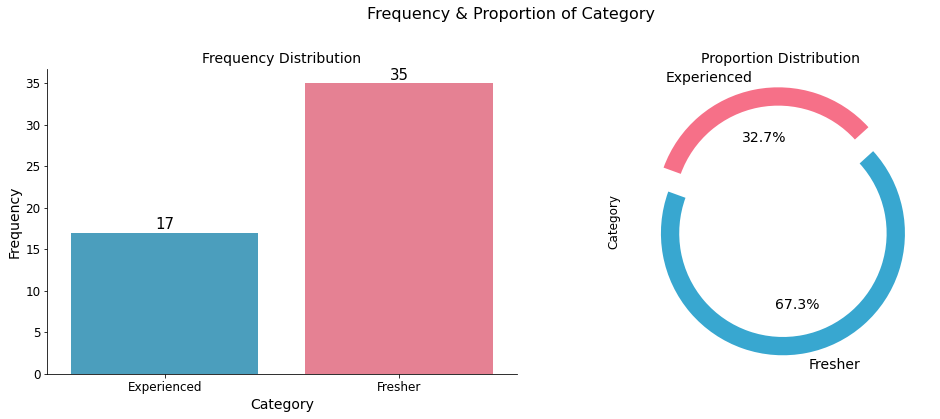

In [24]:
palette = ['#38A7D0', '#F67088']
fig = plt.figure(figsize = [15, 6])
plt.subplot(1, 2, 1)
ax = sns.countplot(x = 'Category', data = df, palette = palette)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.xlabel(xlabel = 'Category', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title(label = 'Frequency Distribution', size = 14)

plt.subplot(1, 2, 2)
space = np.ones(len(df.Category.unique()))/10
df['Category'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', 
                                 wedgeprops = dict(width=0.15), startangle = 160, figsize = [15, 6], legend = False,
                                  colors=palette)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Category', y = 1.02, size = 16)
plt.show()

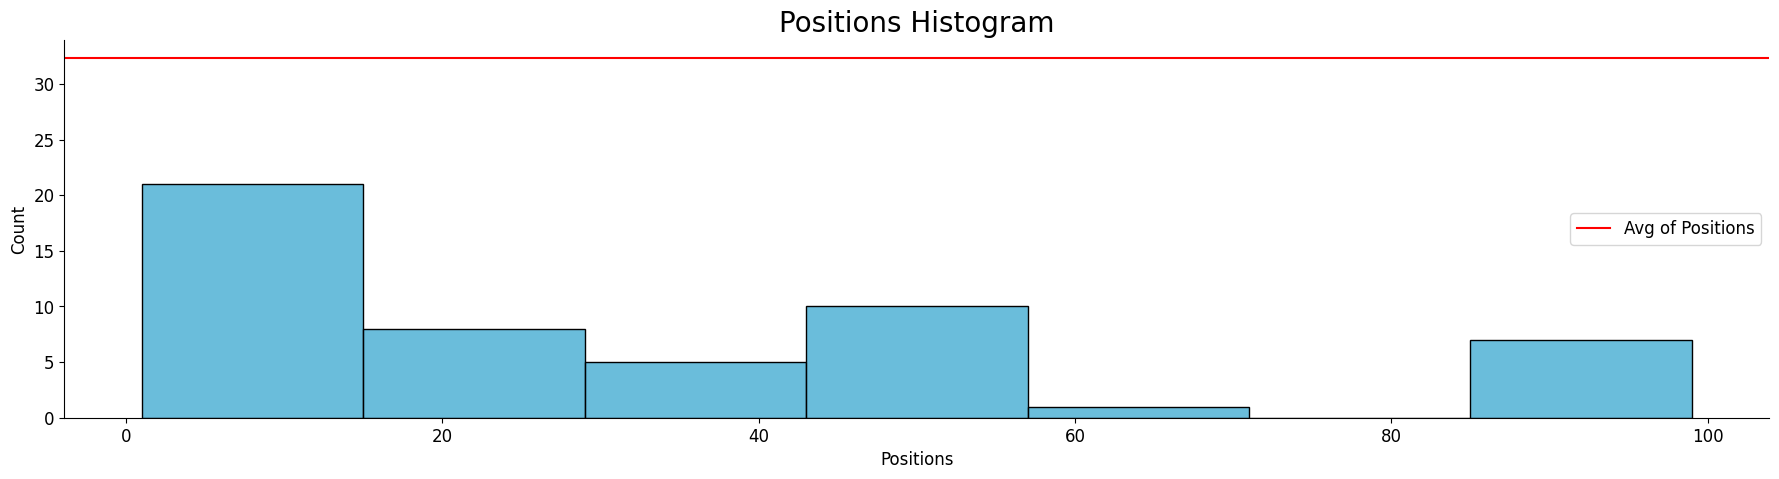

In [25]:
plt.figure(figsize=(22,5), dpi=100)
ax = sns.histplot(df['Positions'], color = palette[0])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Positions Histogram', fontsize=20)
plt.axhline(df.Positions.mean(), color='red')
plt.legend(['Avg of Positions'])
plt.show()

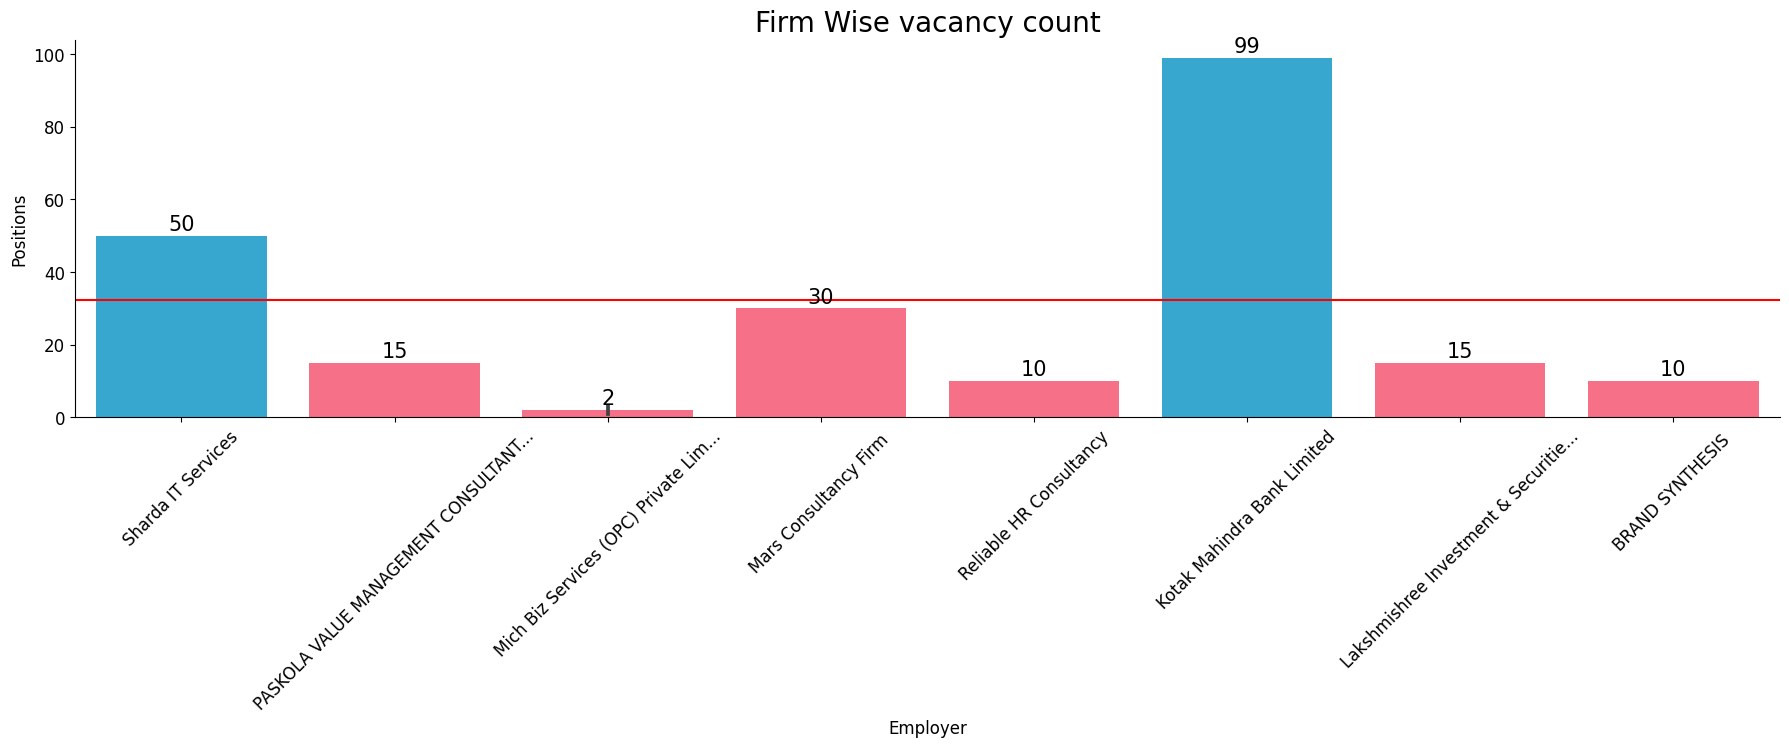

In [26]:
plt.figure(figsize=(22,5), dpi=100)
ax = sns.barplot(x=df['Employer'][:10], y=df['Positions'][:10])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Firm Wise vacancy count', fontsize=20)
plt.axhline(df.Positions.mean(), color='red')

#Annotating each bar
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')

#coloring each bar based on a condition if the bar value is greator or less than count of positions for a given firm 
for i in range(len(ax.patches)):
    #getting the count of each bar
    counts = [p.get_height() for p in ax.patches]
    #getting the colors based on the condition for each bar
    colors = ['#38A7D0' if j > df.Positions.mean() else '#F67088' for j in counts]
    #passing the color for each bar
    ax.patches[i].set_facecolor(colors[i])  
    
plt.xticks(rotation=45)
plt.show()

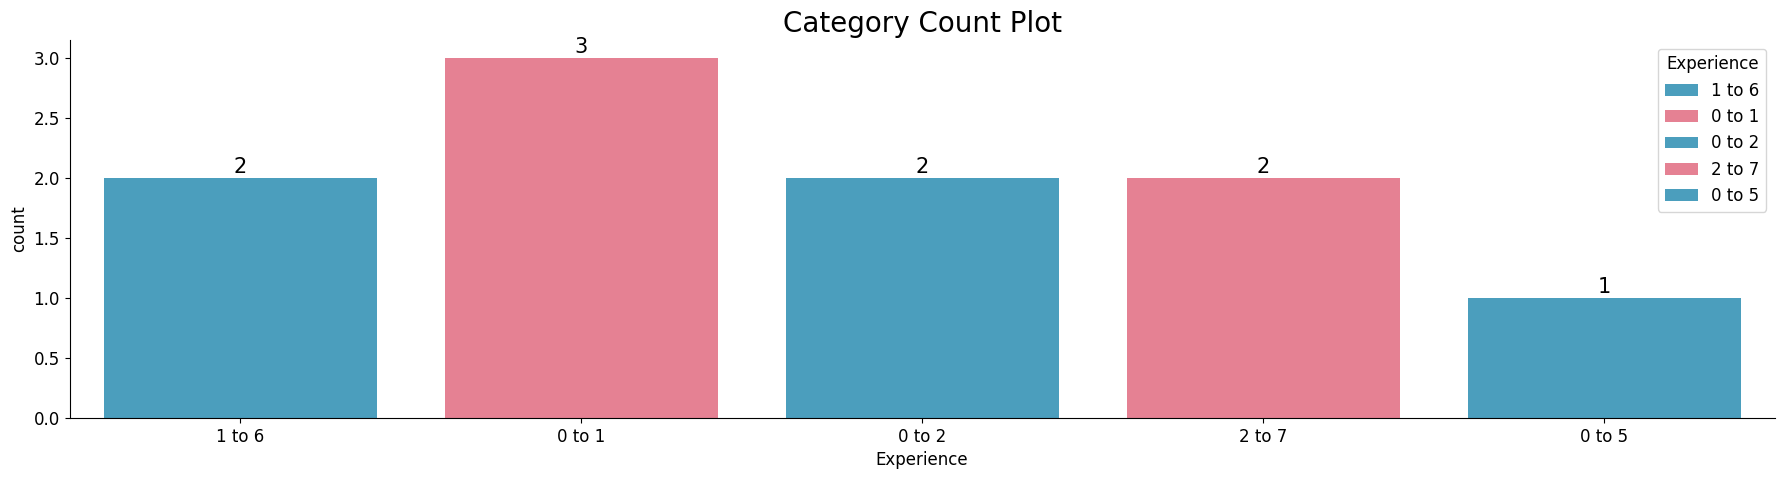

In [27]:
plt.figure(figsize=(22,5), dpi=100)
ax = sns.countplot(data =df,x=df['Experience'][:10], hue=df['Experience'][:10], dodge=False, palette=palette)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Category Count Plot', fontsize=20)
plt.show()